## Exploratory Data Analysis

### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from statsmodels.tsa.seasonal import seasonal_decompose

### Read in Data

In [2]:
crimes_byday = pd.read_csv('../data/crimes_byday.csv', index_col = 0, parse_dates = True)

### Data Visualization - All Crimes

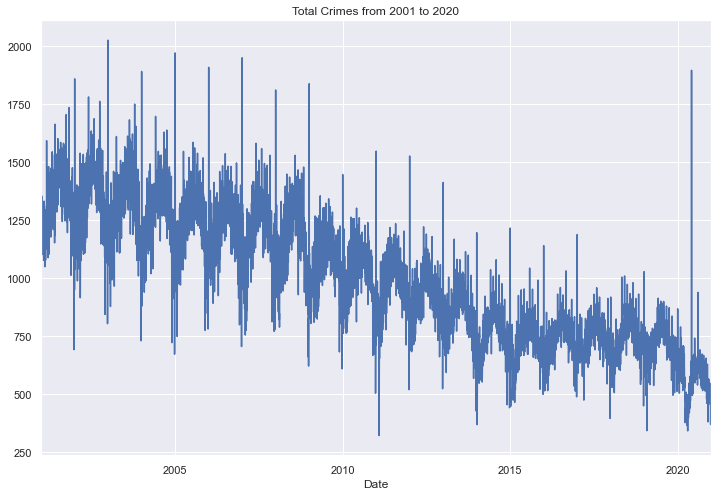

In [3]:
crimes_byday['Total Crimes'].plot(figsize=(12,8))
plt.title('Total Crimes from 2001 to 2020');

We can see from the plot that there is strong annual seasonality as well as a downward trend.  The trend does not appear to be exponential (although it's not quite linear either) and so we'll try both an additive model and multiplicative model for our smoothing algorithm.  In addition there seem to be large spikes on a yearly basis.  We also see a spike this past year, presumably during the time of the riots in the summer.  Let's try to to decompose this and see what we've got. 

### Seasonal Decomposition

In [4]:
decomp = seasonal_decompose(crimes_byday['Total Crimes'], period=365, model = 'add')

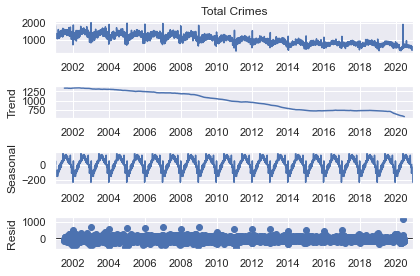

In [5]:
decomp.plot();

We can see the strong annual seasonal component. Let's try multiplicative.  

In [6]:
decomp = seasonal_decompose(crimes_byday['Total Crimes'], period=365, model = 'mul')

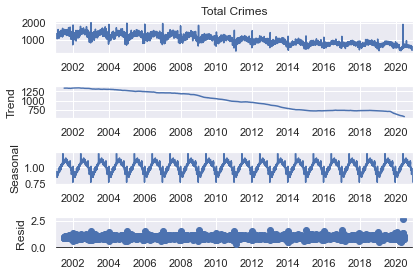

In [7]:
decomp.plot();

Interesting.  The multiplicative model tends to capture the yearly spikes as part of the seasonal component, whereas the additive model didn't, and had a much larger residual.  For this reason, it probably makes sense to use a multiplicative model, although we can try both.   

I also imagine there is a weekly component as well, so let's just look at the last three months.  

In [8]:
decomp = seasonal_decompose(crimes_byday['Total Crimes'].loc['2020-10-01':], period=7, model = 'add')

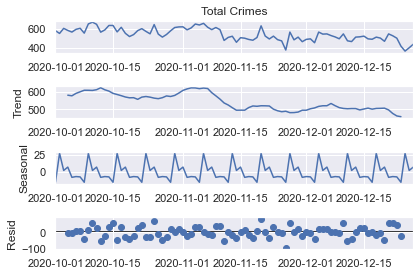

In [9]:
decomp.plot();

So we can see that there is a weekly seasonal component, but it isn't as strong as I would have imagined.  

Let's investigate these spikes a bit further.  We'll blow up just the first five years.  

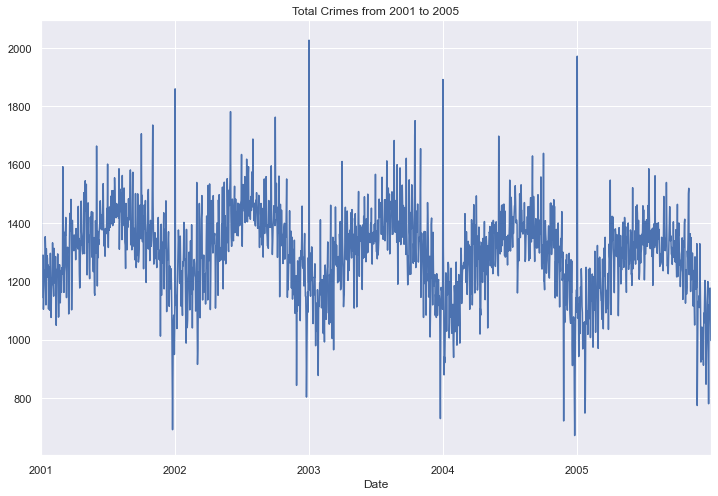

In [10]:
crimes_byday['Total Crimes'].loc['2001-01-01':'2005-12-31'].plot(figsize=(12,8))
plt.title('Total Crimes from 2001 to 2005');

So we see clearly that crimes are generaly higher in the summer and lower in the winter.  There also appears to be a sharp decrease right around the holidays followed by a short spike right on New Year's Day. Let's investigate this further.  

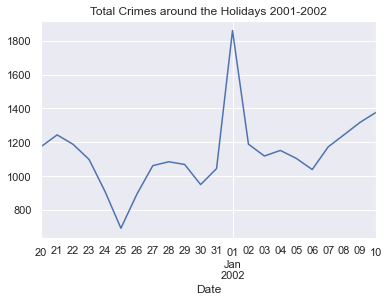

In [11]:
crimes_byday['Total Crimes'].loc['2001-12-20':'2002-01-10'].plot(figsize=(6,4))
plt.title('Total Crimes around the Holidays 2001-2002');

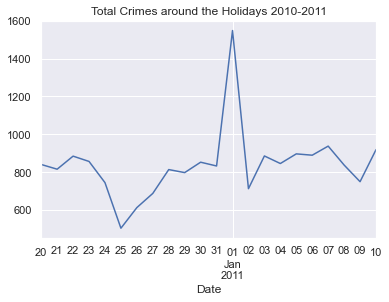

In [12]:
crimes_byday['Total Crimes'].loc['2010-12-20':'2011-01-10'].plot(figsize=(6,4))
plt.title('Total Crimes around the Holidays 2010-2011');

So we're definitely seeing a pattern here.  Crimes are very low on Christmas Day, then gradually increase and then there's a big spike on New Year's Day (presumably in the early morning hours).  Interesting!  

Let's also look at the big spike last summer.  

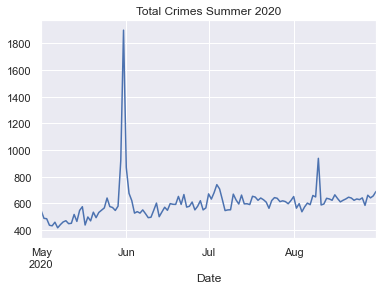

In [13]:
crimes_byday['Total Crimes'].loc['2020-05-01':'2020-08-31'].plot(figsize=(6,4))
plt.title('Total Crimes Summer 2020');

I've researched the dates of the looting in Chicago.  June 1st as well as August 9th and 10th were very violent days, so this corresponds to what we're seeing. 

### Data Visualization - Crime Categories

Now let's plot categories of crimes, which will consist of everything except "Total Crimes", "Arrest", and "Domestic" (since those all contain the other categories).  

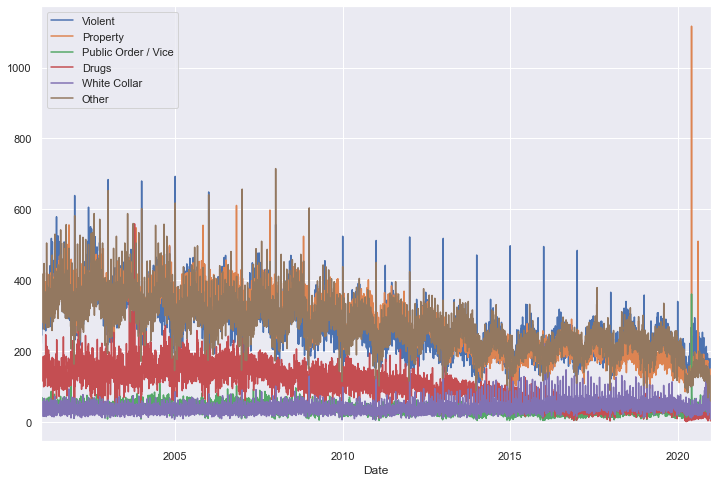

In [16]:
crime_groups = crimes_byday.columns[3:]

crimes_byday[crime_groups].plot(figsize=(12,8),legend=True);

Let's zoom in on 2020.

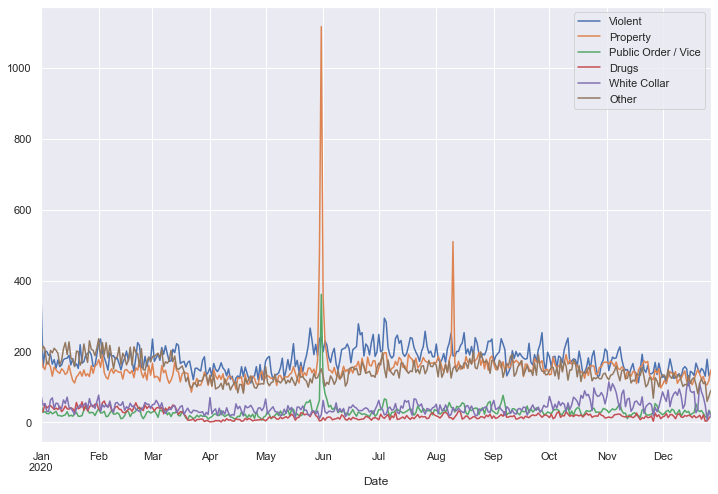

In [17]:
crimes_byday[crime_groups].loc['2020-01-01':].plot(figsize=(12,8),legend=True);

### Data Visualization - Arrests and Domestic Incidents

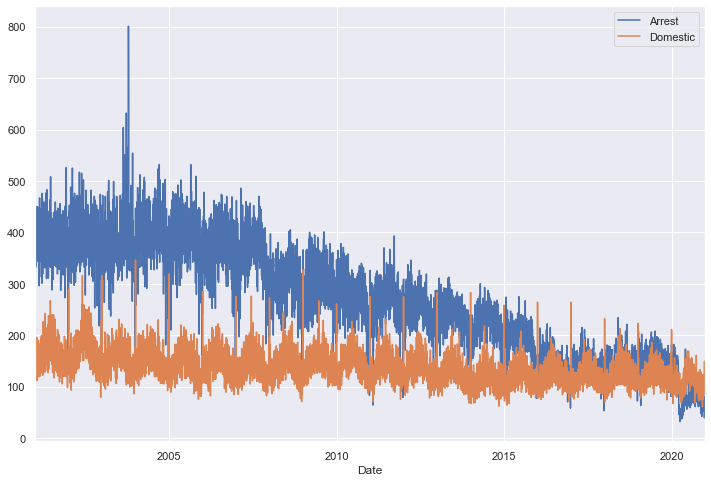

In [19]:
crimes_byday[['Arrest','Domestic']].plot(figsize=(12,8));

That's interesting.  Arrests have shown a downward trend, whereas domestic crimes have not shown the same trend.  And domestic crimes tend to have a strong seasonality to them and that large spike on New Year's Day, whereas arrests don't show that.  